# Introduction
***

The Pythagorean Theorem says the sides *a, b, c* of a right triangle can be described as having the relation $a^2 + b^2 = c^2$.

<img src = "https://github.com/tstrade/PythagPhoto/blob/main/pythag-min%20(2).png?raw=true" width = "300" height = "300">

A Pythagorean Triple is described as being three *nonnegative* integers that satisfy the Pythagorean Theorem, such as (3, 4, 5), where $3^2 + 4^2 = 5^2$. Note that (3, 4, 5) and (4, 3, 5) are considered distinct, but equivalent, Pythagorean Triples. In fact, for all $a \neq b$, (a, b, c) and (b, a, c) are distinct triples that describe equivalent right triangles.

## How to Find Pythagorean Triples
***

Finding triples can be monotonous and feel almost random because we have to check every integer combination to find which $(a, b)$ satisfies $a^2 + b^2 = c^2$. Let's write some code to help us with this task. First, we can import some modules necessary for our code. We will need to use `math` for the square root operation, `matplotlib.pyplot` for graphing, and `cmath` for complex numbers.

In [1]:
from math import sqrt as sq
import matplotlib.pyplot as plt
import cmath
%config InlineBackend.figure_format = 'retina'

Now that we have the tools we need, we can write a helper function `isInt(a, b)` that will return `True` if the tuple $(a, b)$ produces an integer solution to $a^2 + b^2 = c^2$. *In other words,* $\sqrt{a^2 + b^2}$ *is an integer.* We round $c$ to the nearest integer $k$ because if $a^2 + b^2 = k^2$, then $k = c$ and $c$ is an integer. 

In [2]:
def isInt(a, b):                        # Helper function take two integers and returns a boolean value
    c = sq(a**2 + b**2)                 # Applies Pythagorean Theorem  to a and b and stores the result in c
    k = round(c)                        # Rounds c to the nearest integer k
    if a**2 + b**2 == k**2:             # If k satisifies the original Pythagorean theorem, then (a, b) are integers
        return True                     
    else:
        return False                    

For example,

In [23]:
print('(3, 4) produces an integer for c: ' + str(isInt(3, 4)))
print('c = ' + str(sq(3**2 + 4**2)))
print('(4, 5) produces an integer for c: ' + str(isInt(4, 5)))
print('c = ' + str(sq(4**2 + 5**2)))

(3, 4) produces an integer for c: True
c = 5.0
(4, 5) produces an integer for c: False
c = 6.4031242374328485


Before defining our main function, let's write another helper function `checkRepeats(repeats)`. When collecting Pythagorean Triples, the focus will be put on unique tuples. For example, $(3, 4)$ and $(4, 3)$ both produce $c = 5$ and are therefore equivalent. This function will take a list of triples and produce a list of triples where $a \leq b$. An equivalent list could be produced by only taking triples where $b \leq a$. 

In [4]:
def checkRepeats(repeats):                                    # Helper function takes a list of lists and 
    return [[a, b, c] for [a, b, c] in repeats if a <= b]     # removes repeat entries

For example,

In [5]:
test = [[1, 2, 3], [2, 1, 3], [3, 2, 1], [2, 3, 1], [1, 3, 2], [3, 1, 2]]
checkRepeats(test)

[[1, 2, 3], [2, 3, 1], [1, 3, 2]]

Now the main function, `ptriples(n)`. This takes an integer $n$ as an upper bound for $(a, b)$ such that $a, b < n$. The function will loop through integer values for $a$. For each value of $a$, the function will loop through integer values of $b$ and use `isInt(a, b)` to identify tuples that satisfy the Pythagorean Theorem. To optimize this search, $b$ is only looped through integers such that $b \geq a$ to cut the search time in half. By using list comprehension in the last line, we can add in the other equivalent triples for a complete list of triples up to $n$.

In [6]:
def ptriples(n):                             # Main function that takes an integer n and finds Pythag. Triples with a, b < n 
    htriples = []                            # Initializes the accumulator list
    trip = htriples.append                   # Small optimization
    for a in range(1, n + 1):                # Loops a through all integers up to and including n
        for b in range(a, n + 1):            # For every iteration of a, loops b through all integers from a to n
            if a == b:                       # Pythag. Triples don't occur when a and b are the same
                continue                     # Pushes the loop to the next iteration of b
            if isInt(a, b):                  # Uses helper function isInt(a, b) to verify values for Pythag. Triples
                c = round(sq(a**2 + b**2))   # Establishes the hypotenuse value
                trip([a, b, c])              # If a, b produce the square of an integer, append values as a list
    return htriples + [[b, a, c] for         # Range optimization excludes equivalent triples since a < b in htriples
                       [a, b, c] in htriples # List comprehension generates excluded triples
                       if a != b]            # Return all Pythag. Triples with a, b < n (including equivalent triples)

triples = ptriples(5000)                     # This variable is storing data that we will soon graph
unique = checkRepeats(triples)               # This variable is storing data that we will soon graph

For example,

In [7]:
ptriples(20)

[[3, 4, 5],
 [5, 12, 13],
 [6, 8, 10],
 [8, 15, 17],
 [9, 12, 15],
 [12, 16, 20],
 [15, 20, 25],
 [4, 3, 5],
 [12, 5, 13],
 [8, 6, 10],
 [15, 8, 17],
 [12, 9, 15],
 [16, 12, 20],
 [20, 15, 25]]

Using the list of triples of $a, b$ < 5000 stored in the variable `triples`, we can graph each tuple *($a, b$) as (x, y)* and examine any emergent patterns. In addition to this, let's place a graph of the unique tuples obtained from `checkRepeats(repeats)` next to it to see if any patterns repeat or if new ones emerge. 

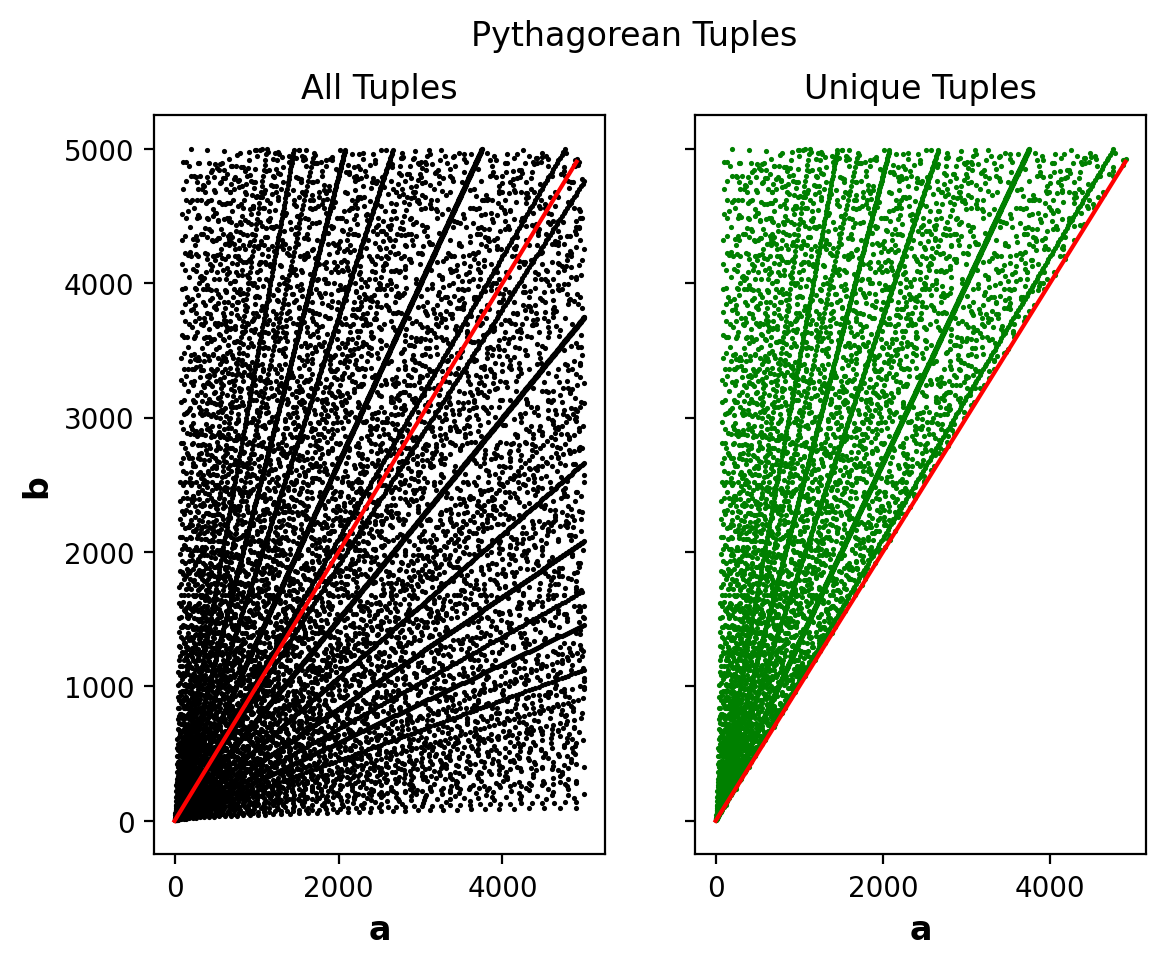

In [8]:
a = [i[0] for i in triples]                                   # List comprehension adds in data points
b = [i[1] for i in triples]
x = [i[0] for i in unique]
y = [i[1] for i in unique]
z = [i for i in range(x[-1])]

fig, (ax1, ax2) = plt.subplots(1, 2)                         # Creates a figure of two horizonally arranged subplots
fig.suptitle('Pythagorean Tuples')

ax1.scatter(a, b, 3, c = 'k', marker = '.', linewidth = 1)   # First subplot information
ax1.plot(z, z, c = 'r')                                      # Represents y = x as the reflective axis
ax1.set_title('All Tuples')
ax1.set_xlabel('a', fontsize='large', fontweight='bold')
ax1.set_ylabel('b', fontsize='large', fontweight='bold')

ax2.scatter(x, y, 3, c = 'g', marker = '.', linewidth = 1)   # Second subplot information
ax2.plot(z, z, c = 'r')                                      # Represents y = x as the reflective axis
ax2.set_title('Unique Tuples')
ax2.set_xlabel('a', fontsize='large', fontweight='bold')
ax2.label_outer()

There are two patterns that these graphs reveal: rays of triples from the origin and symmetry across $y = x$ *(represented by the red line)*. The rays appear due to multiples of Pythagorean Triples such as $(6, 8, 10)$ and $(9, 12, 15)$ are multiples of $(3, 4, 5)$ by 2 and 3, respectively. The lines on either side of $y = x$ have a slope of $\frac{4}{3}$ and $\frac{3}{4}$ because they contain equivalent triples. In *Unique Tuples* we can see that sorting triples such that $a \leq b$ reveals the symmetry of Pythagorean tuples. Notice that no line of multiples appears on $y = x$ because there are no Pythagorean tuples where $a = b$ *(to see this more clearly, type # in front of `ax1.plot(z, z, c = 'r')` for one or both subplots, then run the code)*. 

## Primitive Pythagorean Triples
***

So far we've figured out how to find Pythagorean Triples and we've visualized some of the properties of the corresponding tuples. Both properties observed were a result of the data sets containing equivalent triples and multiples of other triples. There's a way to narrow the data even further, and it's by using ***Primitive Pythagorean Triples*** or *primitives*. A primitive is a triple with $a$ and $b$ relatively prime or *coprime* to each other. This means that the greatest common integer divisor between $a$ and $b$ is 1. Finding the primitives in our data will remove all multiples.

The first step is writing a helper function to find the greatest common divisor between two integers. `gcd(a, b)` takes two integers and loops through integers up to the smallest input because if there is a common divisor, it must be smaller than $a$ and $b$. 

In [9]:
def gcd(a, b):                          # Helper function takes two integers and returns the greatest common divisor
    divisors = []                       # Initialzes accumulator list
    for d in range(1, min(a, b) + 1):   # Loops through integers up to (and including) the smallest of a or b
        if a % d == 0 and b % d == 0:   # If d divides both a and b
            divisors.append(d)          # Add to accumulator
    return max(divisors)                # Returns largest divisor (if it's 1, we know a and b are relatively prime)

For example,

In [10]:
print(str(gcd(6, 8)) + '; i.e., (6, 8) are not coprime.')
print(str(gcd(3, 4)) + '; i.e., (3, 4) are coprime.')

2; i.e., (6, 8) are not coprime.
1; i.e., (3, 4) are coprime.


With the mechanics of our search for primitives in place, let's sort our data variable `unique` into just the primitives using some list comprehesion, which will keep any triple with `gcd(a, b) = 1`. 

*(Note: `primtives(triples)` will not remove equivalent triples, so `checkRepeats(repeats)` is still a necessary function)*

In [11]:
def primitives(triples):                                             # Main function that takes a list of triples
    return [[a, b, c] for [a, b, c] in triples if gcd(a, b) == 1]    # Loops through input and returns primitive triples

primPy = primitives(unique)                                         # This variable is storing data we will soon graph

For example,

In [12]:
primitives(checkRepeats(ptriples(20)))

[[3, 4, 5], [5, 12, 13], [8, 15, 17]]

If we graph this new data containing only the primitive triples from our original data, which contained every Pythagorean Triple such that $a, b < 5000$, we will notice that no longer are there the rays of multiple triples.

Text(0.5, 1.0, 'Primitive Pythagorean Tuples')

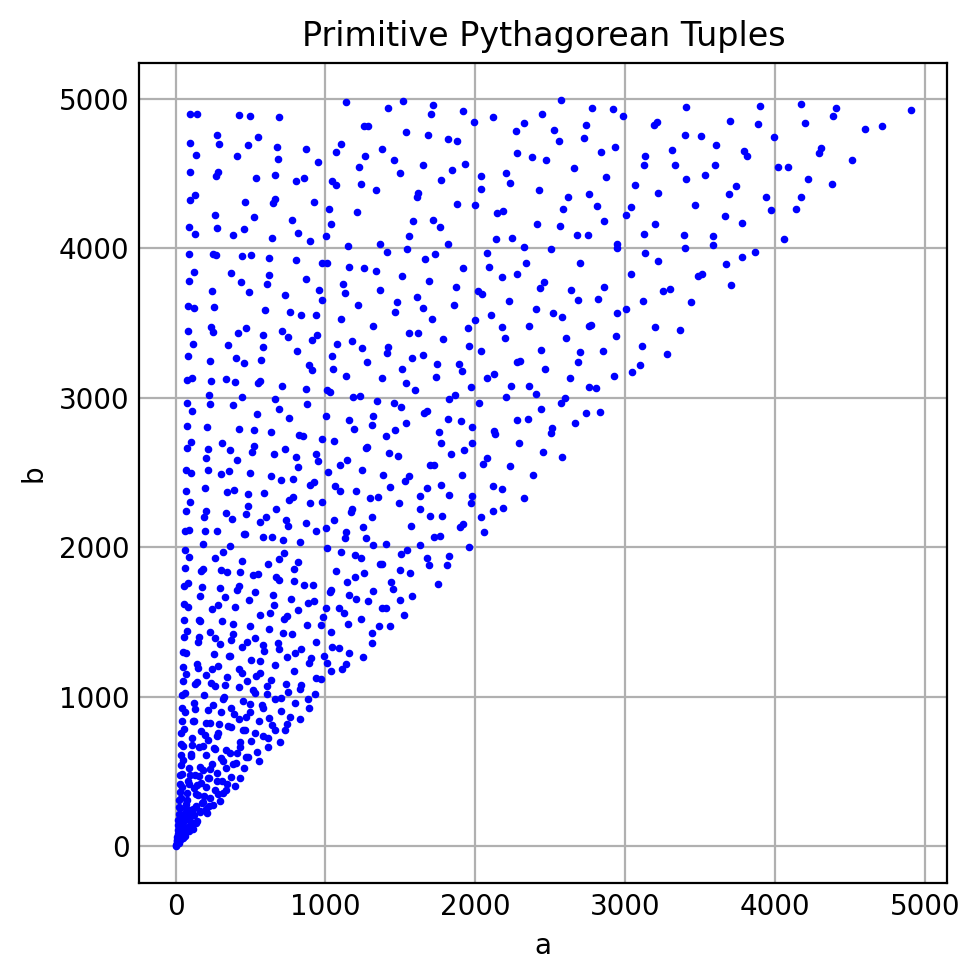

In [26]:
x = [i[0] for i in primPy]
y = [i[1] for i in primPy]

fig = plt.figure()
fig.set_size_inches(5, 5)
ax = fig.add_subplot()

ax.scatter(x, y, 3, 'b')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_title('Primitive Pythagorean Tuples')

It seems that there still are some sort of lines or pattern emerging from the primitives, almost resembling a parabola. Collecting more data points will help zoom the picture out even further to look for a pattern. However, collecting the original data set was slow because as $a$ gets larger, the `ptriples(n)` must loop $b$ through more and more values. Let's look at another way to locate Pythagorean Triples.

### Complex Analysis of Pythagorean Triples
##### How to Use Gaussian Integers to Find Primitives
***

A **Gaussian integer** is a complex number with form $a + bi$* such that $a, b \in \mathbb{Z}^{+}$ *($a$ and $b$ are postive integers)*. For example, $1 + 2i$ is a Guassian integer, and when we graph $1 + 2i$ on the complex plane we see a right triangle form. $a$ is represented by the green leg, $b$ is represented by the red leg, and the hypotenuse is represented by the blue dotted vector.

*$\ i = \sqrt{-1} \implies i^2 = -1$

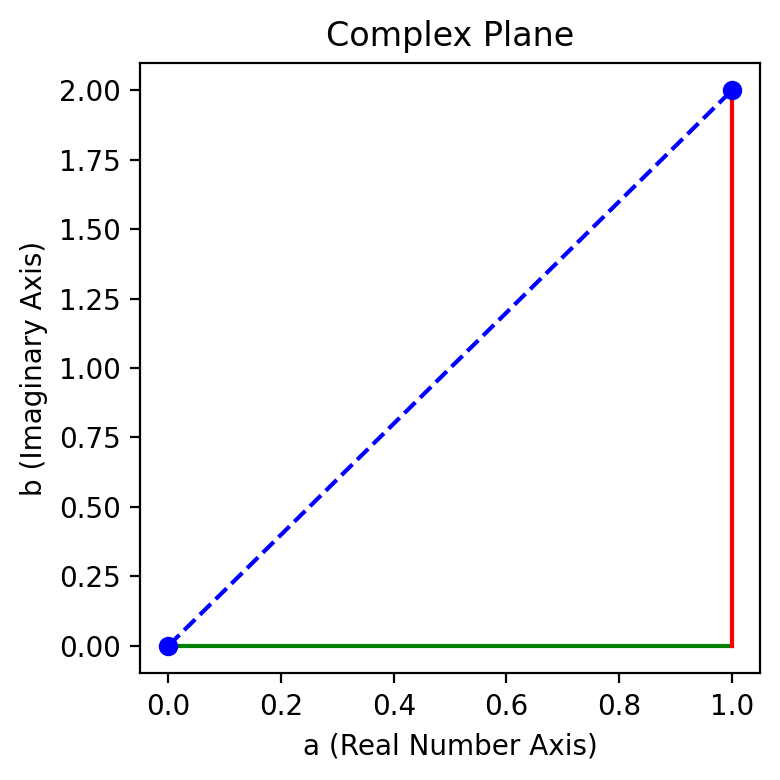

In [14]:
plt.rcParams["figure.figsize"] = [4, 4]
plt.rcParams["figure.autolayout"] = True
# Initializes graph
point1 = [0, 1] 
point2 = [0, 2] 
point3 = [0, 0] 
point4 = [1, 1] 
# Initializes data 
plt.plot(point1, point3, 'g')
plt.plot(point4, point2, 'r')
plt.plot(point1, point2, 'bo', linestyle="--")
# Plots data
plt.xlabel('a (Real Number Axis)')
plt.ylabel('b (Imaginary Axis)')
plt.title('Complex Plane')
# Labels graph
plt.show()

It is easier to see now how complex analysis might start to help us find Pythagorean Triples. In the graph above, we used the Guassian integer $1 + 2i$, which corresponds to the tuple $(1, 2)$. The Pythagorean Theorem tells us that the right triangle formed here has a hypotenuse with length of $\sqrt{5}$; therefore, $(1, 2)$ is *not* a triple. Normally we would just test the next tuple, but there's a way for $(1, 2)$ to still be of use. 

$$ (a + bi)^2 = (a + bi)(a + bi) = a^2 + 2abi + b^2 i^2 = (a^2 - b^2) + 2abi $$

We can find the tuple with a hypotenuse with a length of 5 by squaring the Gaussian integer $1 + 2i$. This is because if $\ (1 + 2i) \rightarrow \sqrt{1^2 + 2^2} = \sqrt{5}$ then $(1 + 2i)^2 \rightarrow 1^2 + 2^2 = 5$. The equation above says that our new Gaussian integer should look like $(1^2 - 2^2) + 2 \cdot 1 \cdot 2 i = -3 + 4i$. Of course the leg of a triangle can never have negative length, but we can use the equivalent tuple to get a valid output that looks like $(2^2 - 1^2) + 2 \cdot 2 \cdot 1 i = 3 + 4i$. Now of course both of these have a hypotenuse with a length of 5, but the only valid triple is $(3, 4, 5)$. Let's graph this with our last Gaussian integer and make some oberservations.

###### Note: We must also switch 1 + 2i to 2 + i, since the latter is the tuple that led to the (3, 4, 5) triple

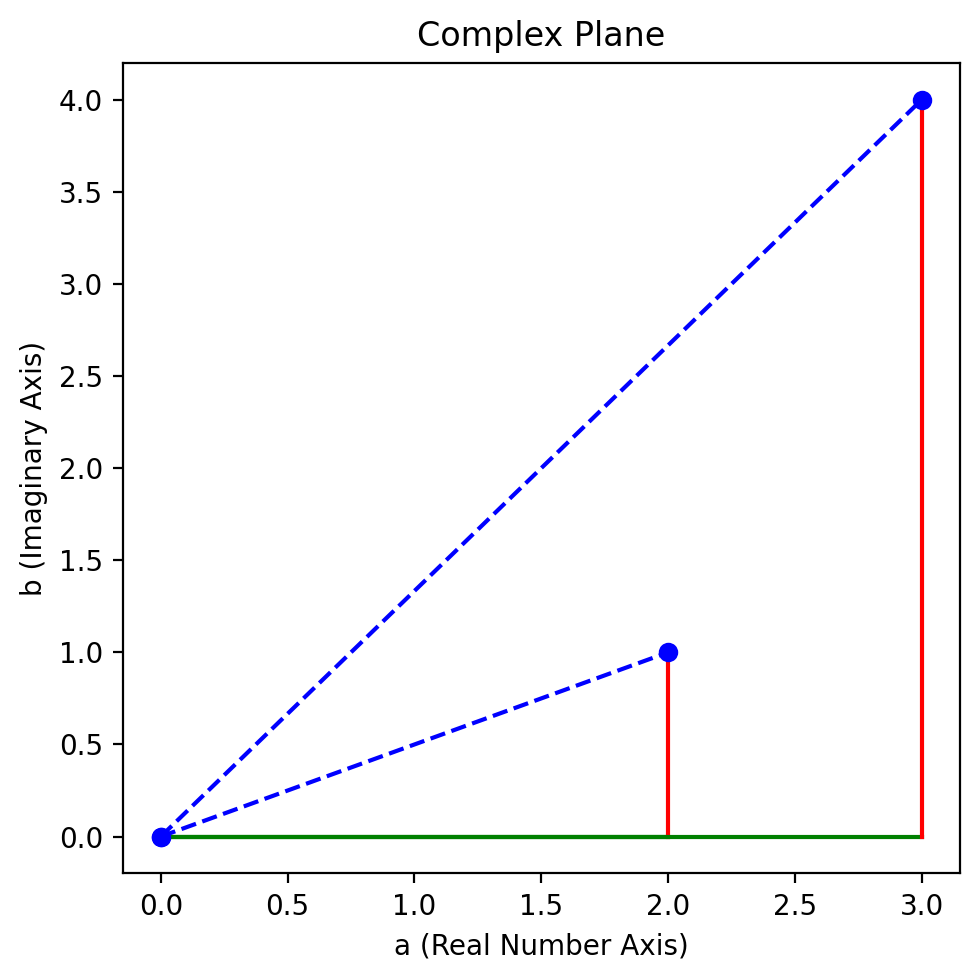

In [15]:
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True
# Initializes graph
point1 = [0, 2]
point2 = [0, 1]
point3 = [0, 0]
point4 = [2, 2]
point5 = [3, 3]
point6 = [0, 4]
point7 = [0, 3]
# Initializes data
plt.plot(point1, point3, 'g')
plt.plot(point4, point2, 'r')
plt.plot(point1, point2, 'bo', linestyle = "--")
plt.plot(point7, point3, 'g')
plt.plot(point5, point6, 'r')
plt.plot(point7, point6, 'bo', linestyle = '--')
# Plots data
plt.xlabel('a (Real Number Axis)')
plt.ylabel('b (Imaginary Axis)')
plt.title('Complex Plane')
# Labels graph
plt.show()

We know that $\cos(\theta) = \frac{adjacent}{hypotenuse}$, or $\theta = \arccos(\frac{adjacent}{hypotenuse})$. If we plug in the appropriate numbers for each triangle, assuming that $\theta$ is the angle between the green leg and the dotted blue hypotenuse, we find that $2 + i$ forms an angle of $26.26^\circ$ and $3 + 4i$ forms an angle of $53.13^\circ$. In other words, the angle formed between the hypotenuse and the real number line about doubles when $(a + bi)$ is squared.

Let's write a function that allows us to perform this complex operation on any $(a, b)$. `jMultiply(a, b)` will not just square the input as a Gaussian integer, but it will recognize if it produces a negative and output the appropriate answer in the context of Pythagorean Triples.

In [16]:
def jMultiply(a, b):                            # Alternative function that takes two integers and returns a Pythag. Triple
    l = a**2 + b**2                             # Stores the integer representing "c^2" or the hypotenuse squared 
    x = complex(a, b)**2                        # Forms a comblex number with form a + bj then squares it (j = i in cmath)
    if x.real < 0:                              # If a > b, squaring a + bi will be a negative (ex. (1, 2) returns [-3, 4, 5])
        y = complex(b, a)**2                    # An equivalent solution is to input (b, a)
        return [int(y.real), int(y.imag), l]    # Return the switched components as a Pythag. Triple
    elif x.real > 0:                            # If a < b, squaring a + bi will be positive
        return [int(x.real), int(x.imag), l]    # Return the components as a Pythag. Triple

$(7, 24)$ forms a triangle with an angle of $16.26^\circ$. The triple it returns after squaring the corresponding Gaussian integer is:

In [17]:
jMultiply(7, 24)

[527, 336, 625]

In [18]:
print(gcd(7, 24))
print(gcd(527, 336))

1
1


$(527, 336)$ forms a triangle with an angle of $32.52^\circ$, about double the last angle. Interestingly, $(527, 336)$ and $(7, 24)$ are each coprime as well as primitive tuples. This means that we used a tuple we know to be a primitive to point with certainty at a much larger tuple that turned out to be a primitive. It would be foolish to chalk that up to an accident without testing it any further. What if we use our sample of primitives and see if they hold this quality? In the beginning, we were searching for Pythagorean Triples one integer at a time. Now, we might be to able to have a fast and reliable method of producing very large primitives with the help of some intial data. 

The function `primitivePatterns(key)` is large, so let's break it up before analyzing the results The goal is to use an initial list of primitive triples to collect more, much larger primitives. 

1. `key` is a list of primitives; `baseSum` is a string representing the number of triples in the input; `index` will be used to track which triple we are using, in case something goes wrong; `acc` will store our final results (even more triples).


2. The beginning outer `for` loop: `prtv` is the current primitive triple being looped through. We initialize our $a$ and $b$ values and add `prtv` to `acc` only if it isn't already in `acc`, our accumulator list for the final results.


3. The `while` loop: Note that this loop is inside the `for` loop, meaning it fully runs for each iteration through the `for` loop. The code here is executed only while the triple produced is a part of our initial list of primitive triples and `gcd(a, b) = 1`. If the triple meets those conditions, then it is turned into a Gaussian integer and squared with `jMultiply(a, b)`, assigned as `J`, which is added to `acc` only if it isn't already a triple in `acc`. `a` and `b` are then updated to reflect the $a$ and $b$ values of the newest triple.


4. The ending outer `for` loop: The last action the `while` loop is updating the `a` and `b` values, so now we can square those as a Guassian integer and save it in `acc` right away, since it is often too big to be in our intial data set (but we will check anyways). We increase `index` by 1 as the `for` loop before the next iteration begins.


5. This part is our filter. If at ANY point squaring Gaussian primitives produces non-coprime values, we end the function by returning `False` along with some information about the place we went wrong. This tells us if the pattern we are looking for has any backing to it or not. 


6. This finalizes the function by relying some information like how many more triples were obtained from using the initial list. 

In [19]:
def primitivePatterns(key):                                  # Function that takes a list of primitive triples
    # Part 1
    baseSum = str(len(key))                                  # Stores a string representing the length of that list
    print('There are ' + baseSum +
          ' primitives with a, b < ' +
          str(round(key[-1][0], -3)))                        # Prints the number of primitives found with the "old" method
    print()
    index = 0                                                # Initializes an index tracker
    acc = []                                                 # Initializes accumulator list
    # Part 2
    for prtv in key:                                         # Loops through each primitive in the "old" primitives list
        a = prtv[0]                                          # Sets a to the current primitive's 'a' value
        b = prtv[1]                                          # Sets b to the current primitive's 'b' value
        if prtv not in acc:                                  # Adds the triple to acc if it's not in the accumulator already
            acc.append(prtv)
    # Part 3
        while jMultiply(a, b) in key and gcd(a, b) == 1:     # As long as the complex square of a, b is primitive...
            J = jMultiply(a, b)                              # Stores the current complex square triple
            if J not in acc:                                 # Adds the triple if it's not in the accumulator already
                acc.append(J)
            a = acc[-1][0]                                   # Updates a, b to the accumulator's last a','b' values
            b = acc[-1][1]                                   # In other words, the most recently added triple's 'a','b' values
    # Part 4
        final = jMultiply(a, b)                              # Stores the new complex square triple
        if final not in acc:                                 # Adds the triple if it's not in the accumulator already
            acc.append(final)
        index += 1                                           # Increments the index tracker by 1
    # Part 5
        if gcd(a, b) != 1:                                   # If the current a, b are not coprime, the function ends
            print('Index #' + str(index) + ': ' + str(prtv) + 
                  ', Possible Non-Primitive: ' + str(final) +
                  ', GCD: ' + str(gcd(final[0], final[1])))  # Leaves comment about where the function failed
            return False                                     # Returns False to end function and discredits pattern
    # Part 6
    print('This method used the initial ' + baseSum + 
          ' to produce ' + str(len(acc) - len(key)) +
          ' more primitive triples!')                        # Leaves comment about how many more triples were found using
    return acc                                               # squares of complex numbers 

jPrims = primitivePatterns(primPy)

There are 890 primitives with a, b < 5000

This method used the initial 890 to produce 884 more primitive triples!


###### Proof
***

If ($a, b, c$) is a primitive triple, then ($a^2 - b^2,\ 2ab,\ a^2 + b^2$) is a primitive triple. We know that $a^2 + b^2 = c^2$ and $a$ and $b$ are coprime. We want to show that $gcd(a^2 - b^2,\ 2ab) = 1$. Suppose this is false; then, $p | a^2 - b^2$ *(p divides* $a^2 - b^2$*)* and $p | 2ab$ for some prime $p$. 

First, $p | 2ab \implies p | 2$ or $p | a$ or $p | b$. $a$ and $b$ cannot both be even since it is assumed that `gcd(a, b) = 1`, therefore $p | 2$ must be false. Suppose both $a$ and $b$ are odd. They can then be rewritten as $a = 2n + 1$ and $b = 2m + 1$ for some integers $n, m$. If we consider $a^2 + b^2$, the result is that $a^2 = 4n^2 + 4n + 1$ and $b^2 = 4m^2 + 4m + 1$. If we let $k = n^2 + n + m^2 + m$, then $a^2 + b^2 = 4k + 2 = c^2$. No matter the values of $n$ and $m$, $4k$ will always be even and therefore $c^2$ will always be even. Since an odd times an odd is always odd, $c$ must be even.

Next, if $p | a$, then $p | a^2$. Since $p | a^2 - b^2$, it follows that $p | [a^2 - (a^2 - b^2)] \implies p | a^2 - a^2 + b^2 \implies p|b^2\ \implies p|b$. Therefore, $p|a$ and $p | b$. 

If instead $p | b$, then $p | b^2$. It follows that $p | b^2 + a^2 \implies p | [b^2 + (a^2 - b^2)] \implies p | b^2 - b^2 + a^2 \implies p | a^2 \implies p | a$. Therefore, $p | b$ and $p | a$. 

However, we just came to the conclusion that $c$ is even and previously stated that $p \nmid 2$. Since $p | a$ and $p | b$, then $p | a^2 + b^2$, which is an even integer. Now our contradiction is apparent. First, this means that $a$ and $b$ must be an even and an odd integer. Then $a^2 - b^2$ must be odd and $2ab$ is even. Since $p \nmid 2$, then either $p \nmid a$ or $p \nmid b$, whichever is the even integer. In either case, $p \nmid a, b$ because we know if $p$ divides one, it divides the other.

This shows that if $(a, b, c)$ is a primitive triple, then $(a^2 - b^2,\ 2ab,\ a^2 + b^2)$ is a primitive triple.
***

## Conclusion
***

Let's graph this larger data set and see if any pattern emerges from the primitives.

In [20]:
data = checkRepeats(jPrims)
a = [i[0] for i in data]
b = [i[1] for i in data]
c = [i[2] for i in data]

Text(0.5, 1.0, 'Primitive Pythagorean Tuples')

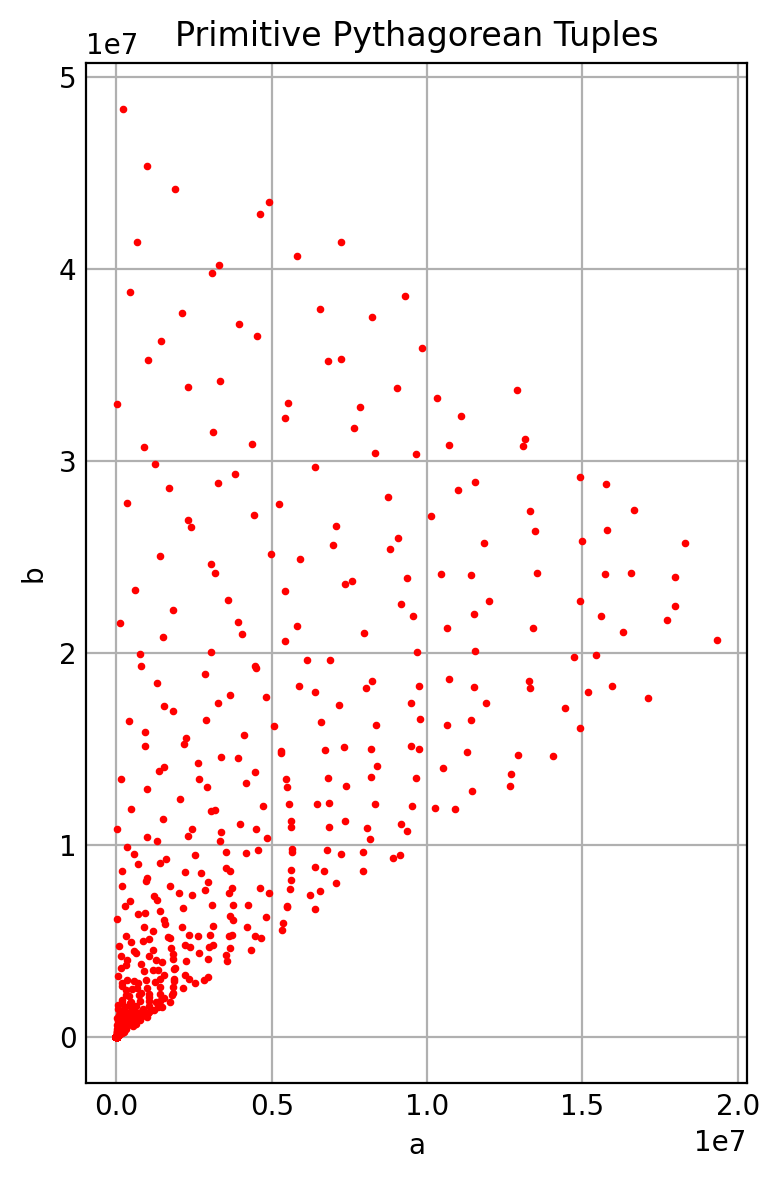

In [25]:
%matplotlib inline
fig = plt.figure()
fig.set_size_inches(4, 6)
ax = fig.add_subplot()

ax.scatter(a, b, 3, 'r')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_title('Primitive Pythagorean Tuples')

Show in the above 2D graph and again below in the 3D interpretation, curves appear throughout the data points. Remember, each time we square a Gaussian integer, we are squaring the length of the hypotenuse *(distance from origin)* and approximately doubling the angle made between the x-axis and a line drawn to the given point. That rotation in the complex plane is one way to visualize why primitives exhibit this pattern on a large scale. Our function repeatedly stretched and rotated vectors associated with our tuples. 

<IPython.core.display.Javascript object>


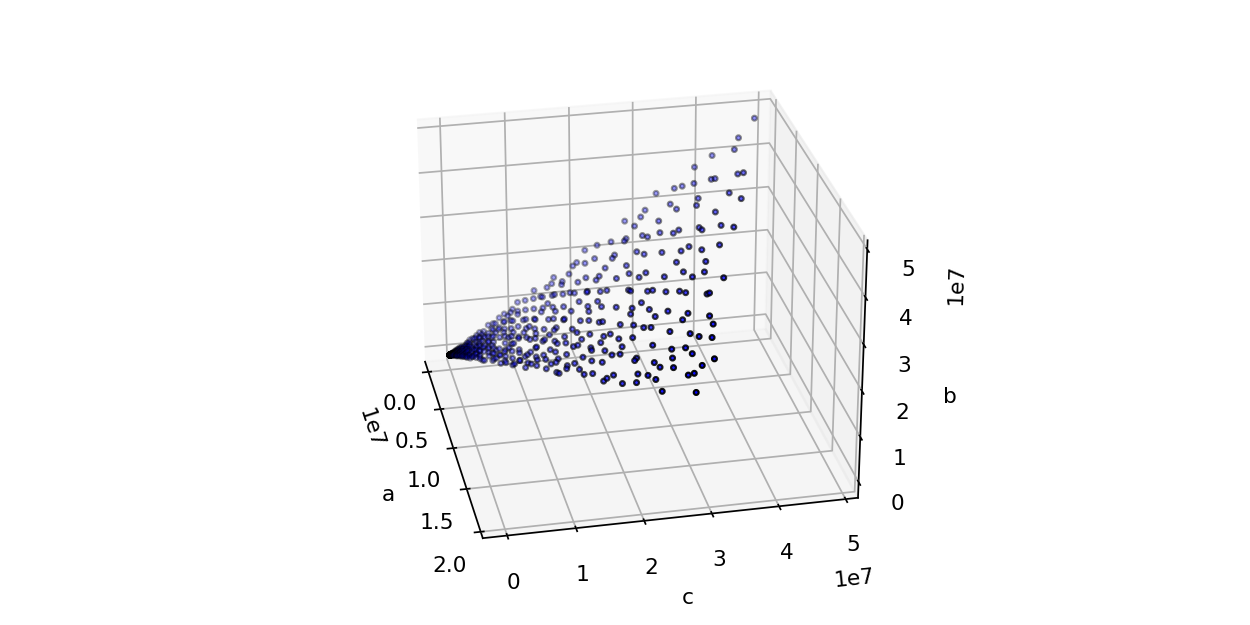

In [22]:
%matplotlib notebook
plt.style.use('_mpl-gallery')
fig = plt.figure()
fig.set_size_inches(8, 4)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a, c, b, c = 'b', edgecolor = 'black', marker = '.')

ax.set_xlabel('a')
ax.set_ylabel('c')
ax.set_zlabel('b')


plt.show()

Here we can see a sheet of primitives in the 3D world, still characterized by the spirals left from our complex analysis. While looking for Pythagorean Triples, we've learned that when plotted, triples: reflect over the `y = x` axis with their equivalents, form outwards rays with their multiples, can be sorted into primitives *(a sort of Pythagorean prime)*, and can be represented in the complex plane as Gaussian integers to speed to large primitive triples with confidence. 

# References
***

https://youtu.be/QJYmyhnaaek - 3Blue1Brown

https://mathmonks.com/pythagorean-theorem - Pythagorean Theorem picture